# 🤖 Project2 – Churn Prediction Modeling
Logistic + RandomForest + 성능평가

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
df = pd.read_csv('data/churn_dataset.csv')
df.head()

,customer_id,total_orders,first_order,last_order,days_between,avg_days_per_order,churn_label
0,1,3,2025-01-20 18:01:50,2025-05-28 01:38:26,127,42.333333,0
1,2,1,2025-10-05 01:51:57,2025-10-05 01:51:57,0,0.000000,1
2,3,1,2025-04-01 05:14:18,2025-04-01 05:14:18,0,0.000000,1
3,4,1,2025-03-19 21:41:36,2025-03-19 21:41:36,0,0.000000,1
4,5,1,2025-04-13 21:41:14,2025-04-13 21:41:14,0,0.000000,1


## Train Test Split

In [7]:
# 1. 사용할 feature 선택
features = ['total_orders', 'days_between', 'avg_days_per_order']
X = df[features]
y = df['churn_label']

# 2. train / test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 스케일링 (Logistic에만 사용)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

logit = LogisticRegression(max_iter=500)
logit.fit(X_train_sc, y_train)
pred_lr = logit.predict(X_test_sc)

print("Logistic Regression")
print("ACC :", accuracy_score(y_test, pred_lr))
print("F1  :", f1_score(y_test, pred_lr))


Logistic Regression
ACC : 1.0
F1  : 1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest")
print("ACC :", accuracy_score(y_test, pred_rf))
print("F1  :", f1_score(y_test, pred_rf))


Random Forest
ACC : 1.0
F1  : 1.0


              feature  importance
0        total_orders    0.344301
1        days_between    0.342755
2  avg_days_per_order    0.312944


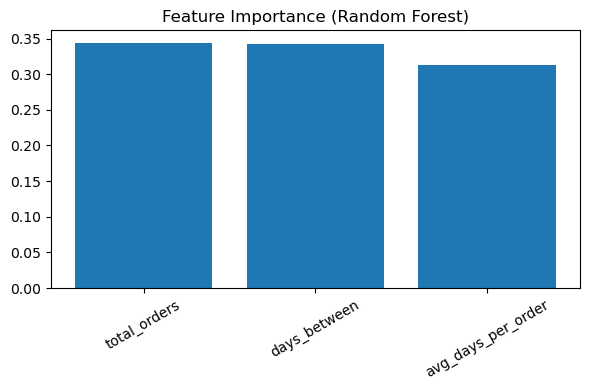

In [22]:
# Feature Importance 계산
import pandas as pd
import matplotlib.pyplot as plt

# feature importance 계산
importances = rf.feature_importances_
imp_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print(imp_df)

# 시각화 + 저장
plt.figure(figsize=(6,4))
plt.bar(imp_df['feature'], imp_df['importance'])
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=30)
plt.tight_layout()

# 🔥 여기서 images 폴더에 자동 저장
plt.savefig('images/churn_feature_importance.png', dpi=150)

plt.show()


## Logistic Regression

In [23]:
logit=LogisticRegression(max_iter=500)
logit.fit(X_train_sc,y_train)
pred=logit.predict(X_test_sc)
print('ACC=',accuracy_score(y_test,pred))
print('F1 =',f1_score(y_test,pred))

ACC= 1.0
F1 = 1.0


## RandomForest

In [24]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)
pred2=rf.predict(X_test)
print('ACC=',accuracy_score(y_test,pred2))
print('F1 =',f1_score(y_test,pred2))

ACC= 1.0
F1 = 1.0


In [25]:
import os
os.makedirs("images", exist_ok=True)